### Pandas built-in data visualization capabilities

Create new dataframe or use seaborn'sbuilt-in datasets

In [1]:
# import libraries
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# Generating dataframe
# Use data_range function from pandas
# periods = 500, number of periods (days) to generate
dates = pd.date_range('1/1/2000', periods= 500)

# Setting seed to get same random number
np.random.seed(42)

# Generate a series using rand()
col_D = np.random.rand(500)

# Use numpy's randn for 'Standard normal' distribution
data1 = np.random.randn(500,3)

# randn (1000,4) 1000 by 4 -> 2D array
df1 = pd.DataFrame(data = data1, index = dates, columns = ['A', 'B', 'C'])

In [3]:
# Look at the dataframe using head()
df1.head()

,A,B,C
2000-01-01,0.341756,1.876171,0.950424
2000-01-02,-0.576904,-0.898415,0.491919
2000-01-03,-1.320233,1.831459,1.179440
2000-01-04,-0.469176,-1.713135,1.353872
2000-01-05,-0.114540,1.237816,-1.594428


In [4]:
# add col_D to df1
df1['D'] = col_D
df1.head()

,A,B,C,D
2000-01-01,0.341756,1.876171,0.950424,0.374540
2000-01-02,-0.576904,-0.898415,0.491919,0.950714
2000-01-03,-1.320233,1.831459,1.179440,0.731994
2000-01-04,-0.469176,-1.713135,1.353872,0.598658
2000-01-05,-0.114540,1.237816,-1.594428,0.156019


In [5]:
# Generate second dataframe
# rand (20,3) 20 by 3 -> 2D array
# setting seed
np.random.seed(42)

data2 = np.random.randn(20,3)
col = ['X', 'Y', 'Z']
df2 = pd.DataFrame(data = data2, columns = col)

In [6]:
df2.head()

,X,Y,Z
0,0.496714,-0.138264,0.647689
1,1.523030,-0.234153,-0.234137
2,1.579213,0.767435,-0.469474
3,0.542560,-0.463418,-0.465730
4,0.241962,-1.913280,-1.724918


#### Plots

Getting histomgram plot using:
- DataFrame.hist()
- DataFrame.plot(kind = 'hist')


<Axes: ylabel='Frequency'>

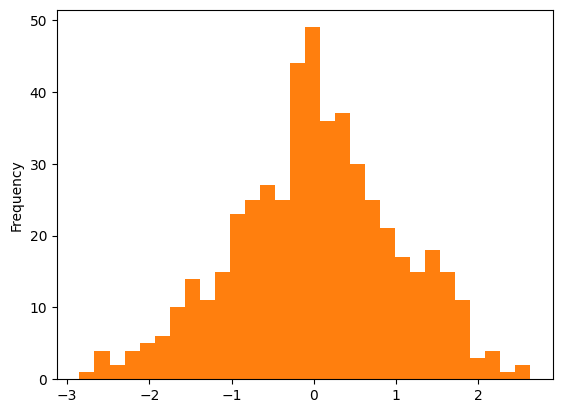

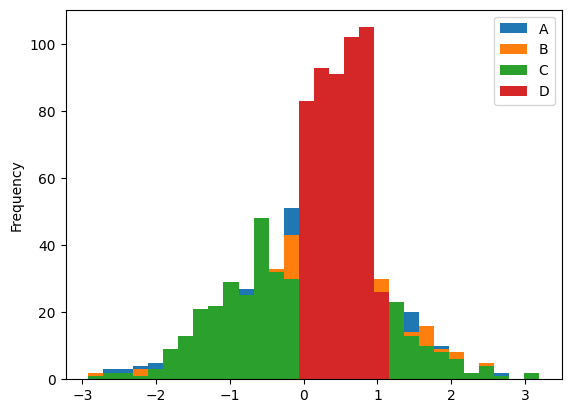

In [7]:
# make histogram 
df1['A'].hist(bins=30) # using matplotlib
df1['A'].plot(kind = 'hist', bins = 30) # using plot() and kind = 'hist'

# for the whole dataset
df1.plot(kind = 'hist', bins = 30)

#### Style sheets
Matplotlib has style sheets. We can use them to make our plots look a little nicer. These style sheets
include plot_bmh,plot_fivethirtyeight,plot_ggplot and more. They basically create a set of style
rules that our plots follow. 

https://matplotlib.org/2.0.2/gallery.html

<Axes: >

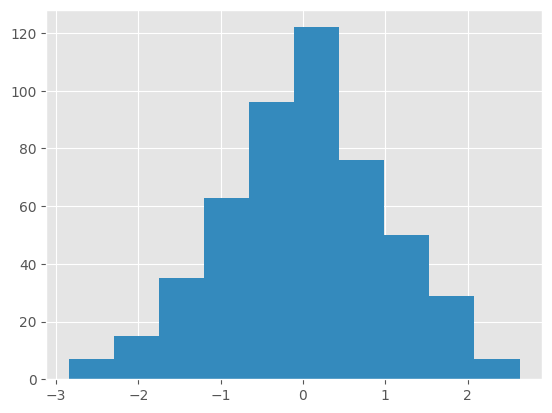

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# replot the above plot
df1['A'].hist()

# Test another style
plt.style.use('bmh')
df1['A'].hist()


<Axes: >

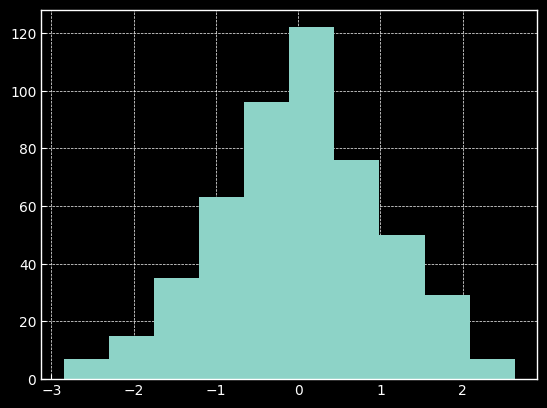

In [9]:
# Change the background
plt.style.use('dark_background')
df1['A'].hist()

<Axes: >

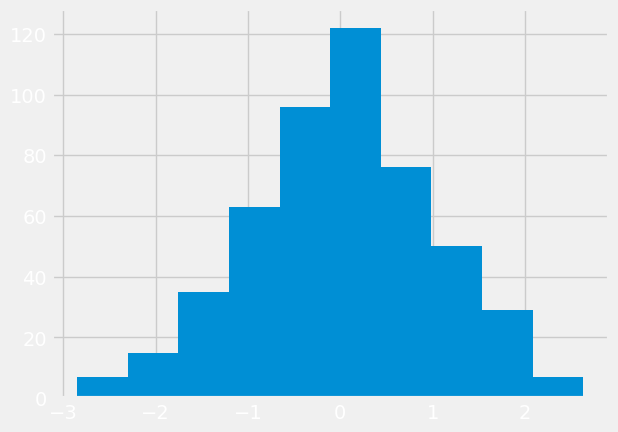

In [10]:
# test different style sheet
plt.style.use('fivethirtyeight')
df1['A'].hist()

In [11]:
# using 'ggplot' style
plt.style.use('ggplot')

#### Plot Types

There are several built-in plot types (given below) in pandas, most of them are statistical plots by nature:

- df.plot.area
- df.plot.bar
- df.plot.barh
- df.plot.hist
- df.plot.line
- df.plot.scatter
- df.plot.box
- df.plot.hexbin
- df.plot.kde
- df.plot.density
- df.plot.pie

Or call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','barh', etc.)



<Axes: >

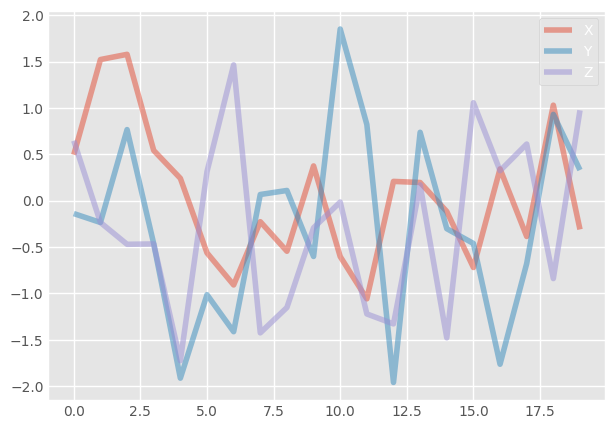

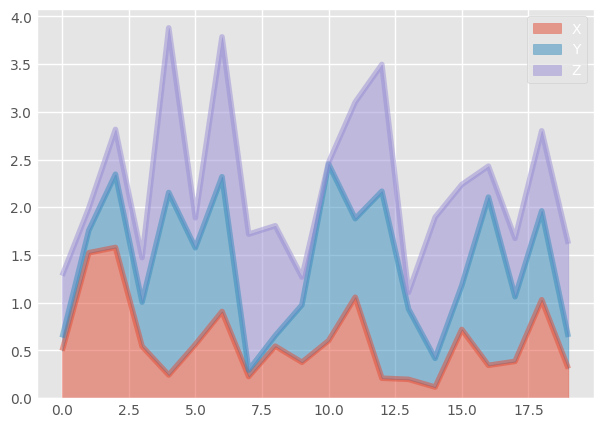

In [12]:
# Area plot
df2.plot(alpha=0.5)
df2_abs = df2.abs()
df2_abs.plot(kind = 'area', alpha=0.5)
# Since the columns of df2 have both positive and negative values, the area plot returns error
# because When stacked is True, each column must be either all positive or all negative.


<Axes: >

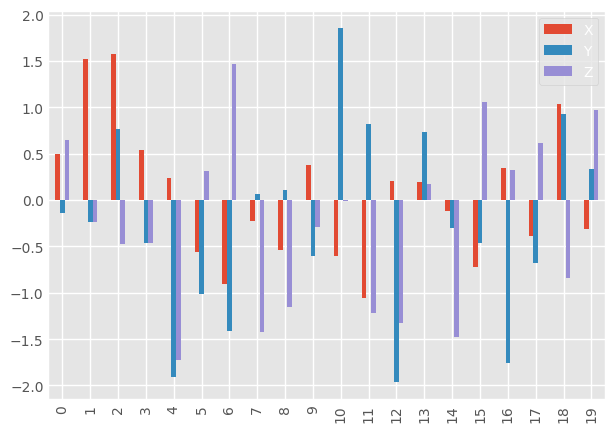

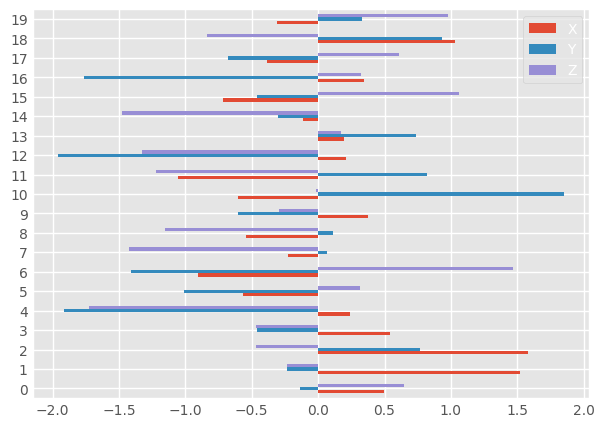

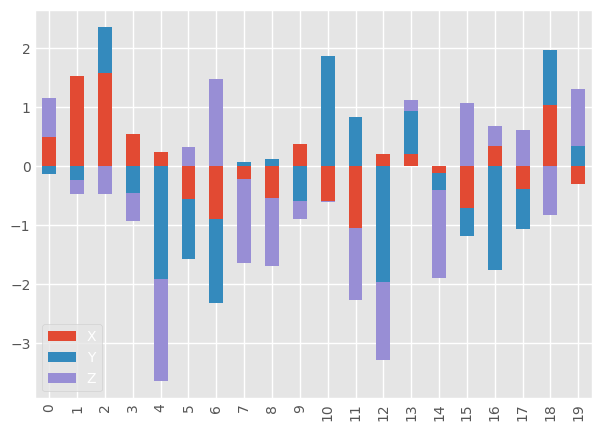

In [13]:
# Bar & barh plots
df2.plot.bar()

 # Horizontal bars
df2.plot.barh()

# we can stack them on top of each other
df2.plot.bar(stacked=True)

<Axes: ylabel='Frequency'>

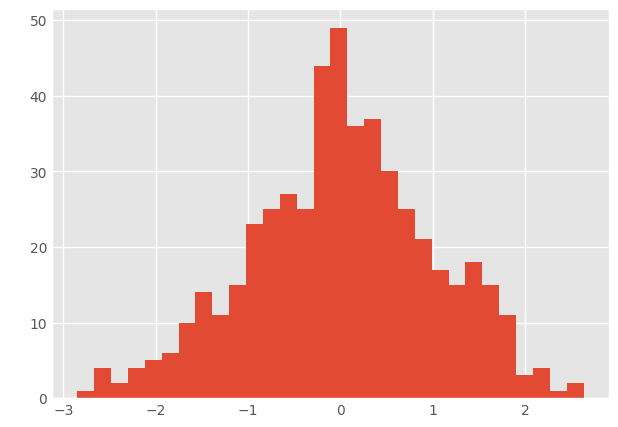

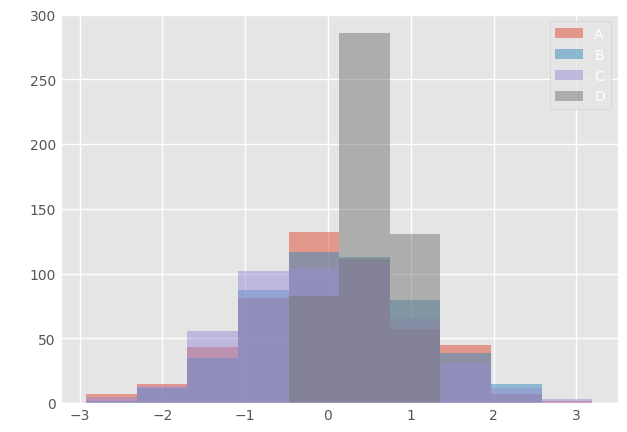

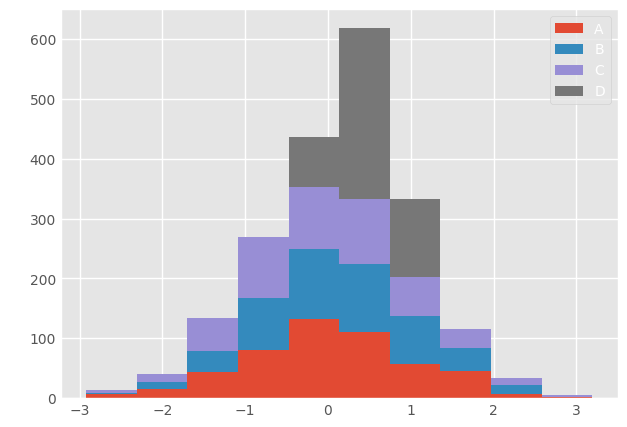

In [14]:
# Histogram
df1['A'].plot.hist(bins=30)

# get all the columns on the same plot
df1.plot.hist(alpha = 0.5)

# stacked using stacked=True
df1.plot.hist(stacked = True)

<Axes: xlabel='Frequency'>

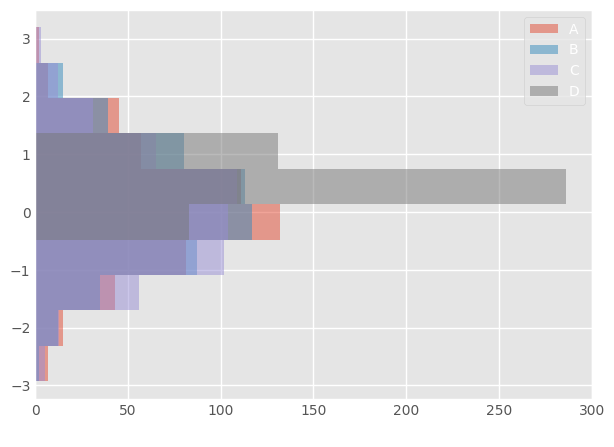

In [15]:
# using matplotlib hist's keywords, such as horizontal (orientation='horizontal'), cumulative (cumulative=True)
df1.plot.hist(orientation='horizontal',alpha = 0.5)

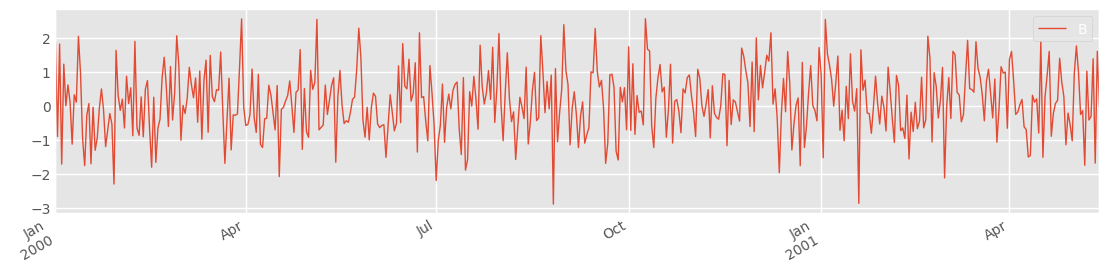

In [16]:
# line plots
# Converting the index as date
df1.index = pd.to_datetime(df1.index)
df1.head()

df1.plot.line(y='B',figsize=(12,3),lw=1)
plt.gcf().autofmt_xdate() # it trys to format the x-axis nicely.

# By default the index alongs with x



<Axes: xlabel='C', ylabel='D'>

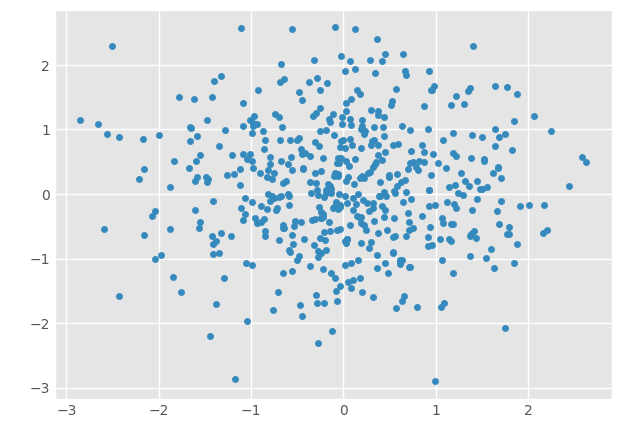

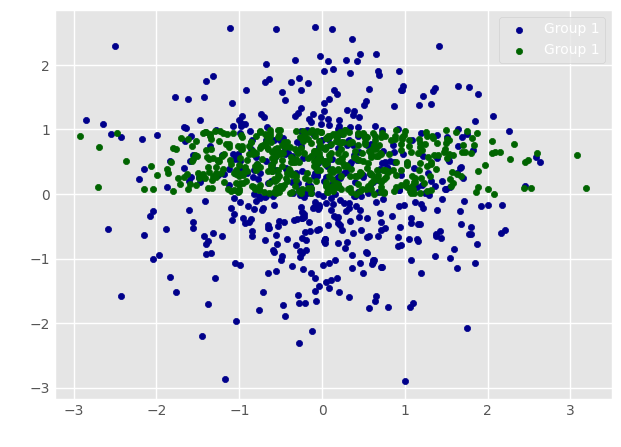

In [17]:
# scatter plot
# DataFrame.plot.scatter()
# Scatter plot requires numeric columns for “x” and “y” axes
df1.plot.scatter(x = 'A', y = 'B')

# plot multiple column groups on a single axes by repeating plot method specifying target axes ax
# specify color and label keywords to distinguish each groups
# putting two scatter plots on top on each other
ax = df1.plot.scatter(x='A',y='B', color='DarkBlue', label='Group 1')

df1.plot.scatter(x='C',y='D', color='DarkGreen', label='Group 1', ax = ax) # notice ax = ax

<Axes: xlabel='A', ylabel='B'>

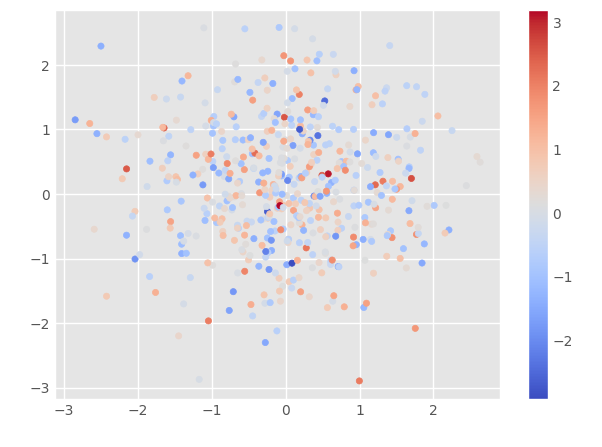

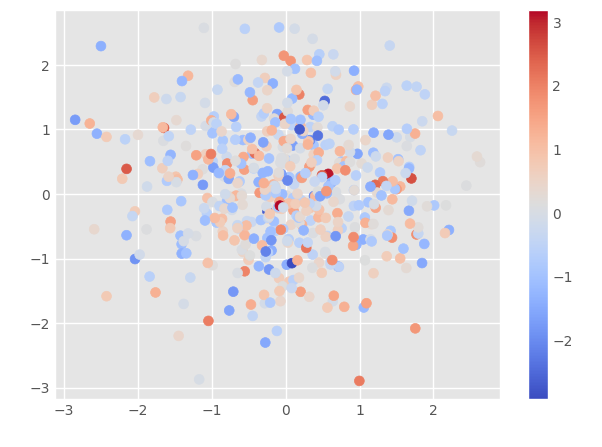

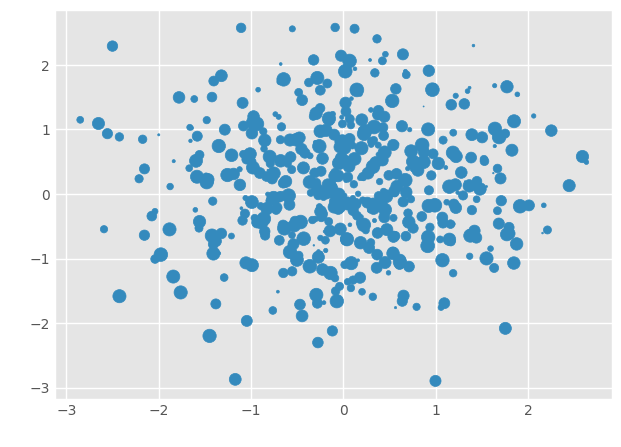

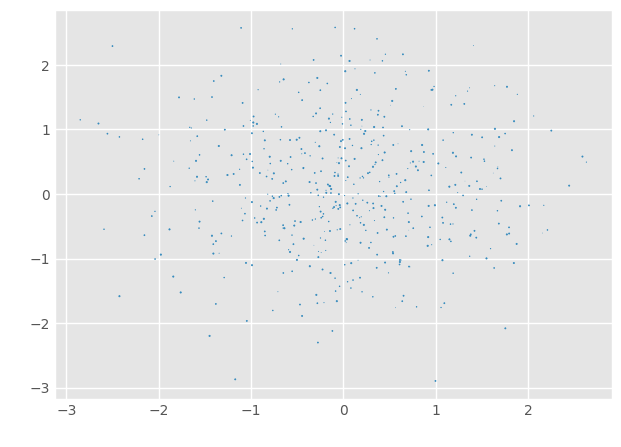

In [18]:
# keyword 'c' is the name of column to provide color for each point, 
# '.cmap' indicates colormap
# passing column "C" as a third dimension (color)
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

# 's' indicates the size
df1.plot.scatter(x = 'A', y = 'B', c = 'C', s = 50, cmap = 'coolwarm')

df1.plot.scatter(x='A', y='B', s=df1['D']*100) # To Do: Try removing "100" in "s" and see the difference
df1.plot.scatter(x='A', y='B', s=df1['D'])

<Axes: >

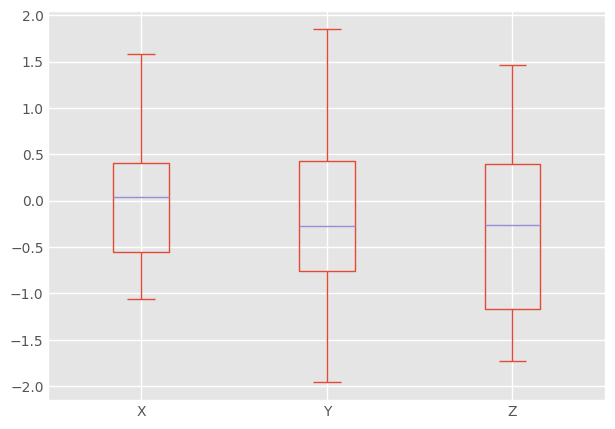

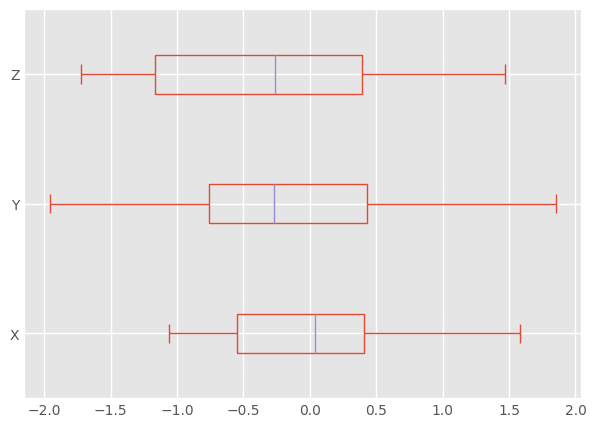

In [19]:
# box plot
# visualize the distribution of values within each column.
df2.plot.box()

# We can conveniently change the orientation
df2.plot.box(vert=False)

,X,Y,Z,group
0,0.496714,-0.138264,0.647689,B
1,1.523030,-0.234153,-0.234137,A
2,1.579213,0.767435,-0.469474,B
3,0.542560,-0.463418,-0.465730,A
4,0.241962,-1.913280,-1.724918,A


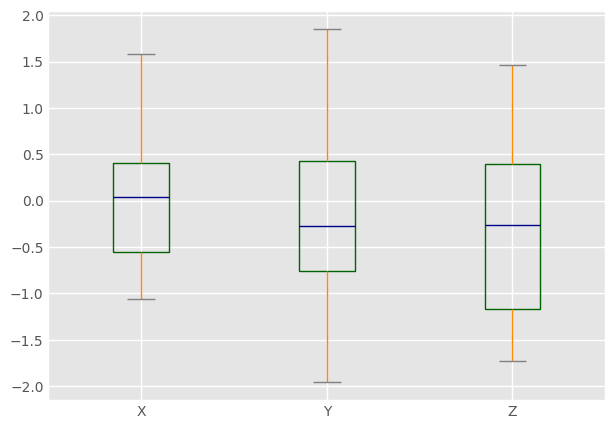

In [20]:
# color the boxplot by passing color keyword
# pass a dictionary whose keys are boxes, whiskers, medians and caps
# create a dictionary color to create a boxplot with different colors
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue',caps='Gray')

df2.plot.box(color=color) # using dictionary for colors in the boxplot

# pass a by argument for groupby in the box plots
# adding a new column "grop" in df2
df2['group'] = np.random.choice(['A', 'B'], size=20)
# size = 20 is no of entries in our dataframe

df2.head() # we got the new column "group"

(array([<Axes: title={'center': 'X'}, xlabel='group'>,
        <Axes: title={'center': 'Y'}, xlabel='group'>], dtype=object),)

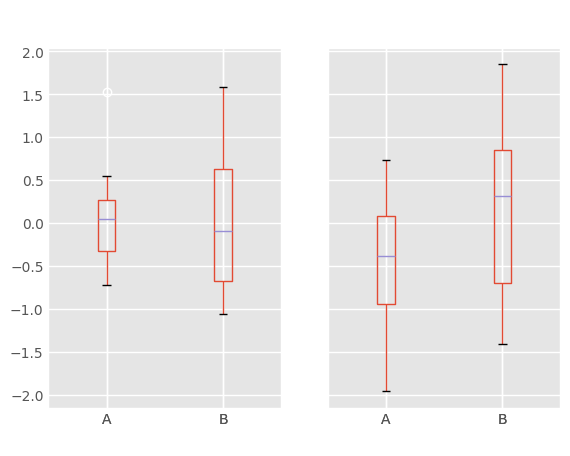

In [21]:
# use DataFrame.boxplot to create a boxplot for column “X” and “Y”
df2.boxplot(column =['X','Y'], by = 'group'),

# To Do: Try adding column 'Z' as well

In [22]:
# dropping columns with inplace = True (permanent change)
df2.drop('group', axis=1, inplace=True)
df2.head() 
# to reconfirm if we still have the column "group"
# Re-running this code will give error if the column is already dropped!

,X,Y,Z
0,0.496714,-0.138264,0.647689
1,1.523030,-0.234153,-0.234137
2,1.579213,0.767435,-0.469474
3,0.542560,-0.463418,-0.465730
4,0.241962,-1.913280,-1.724918


<Axes: xlabel='A', ylabel='B'>

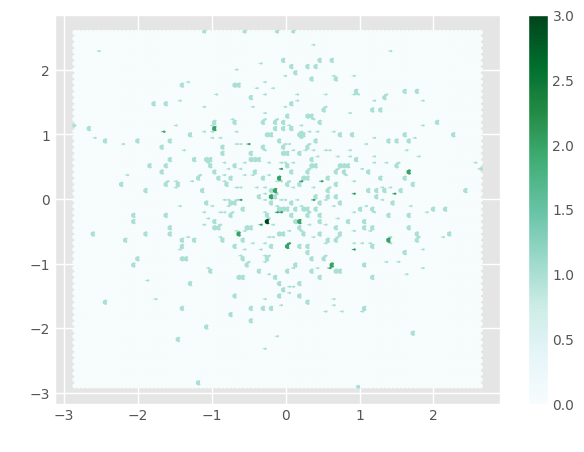

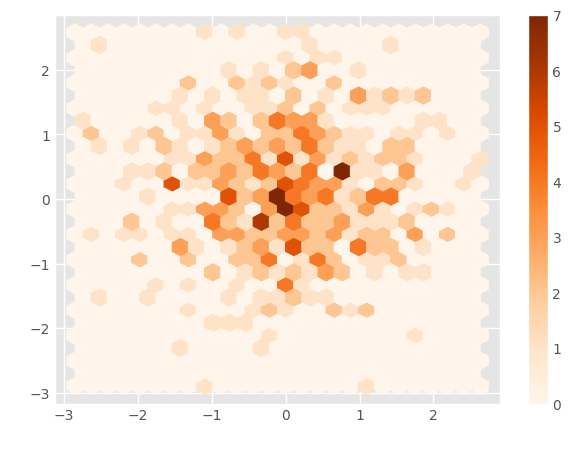

In [23]:
# Hexagonal Bin Plot
# if data are too dense to plot each point individually, hexbin plots are very useful alternative to the scatter plots under such situation
df1.plot.hexbin(x='A',y='B')

# keyword argument is gridsize, it controls the number of hexagons in the x-direction, and defaults to 100.
# A larger gridsize means more, smaller bins. Let’s pass the gridsize = 25

df1.plot.hexbin(x='A',y='B',gridsize=25,cmap='Oranges') 

# more the datapoints are in the hexbin, darker the bin is

<Axes: ylabel='Density'>

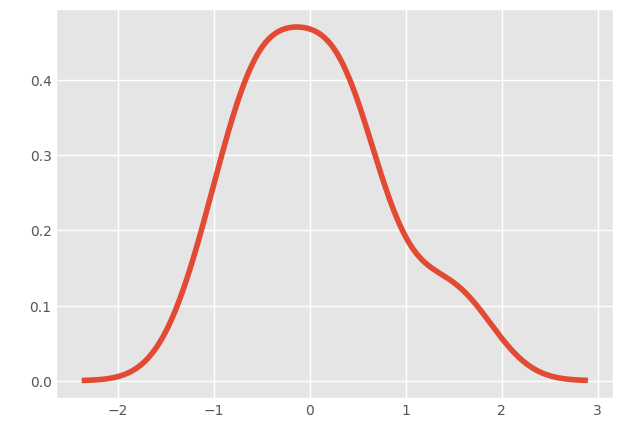

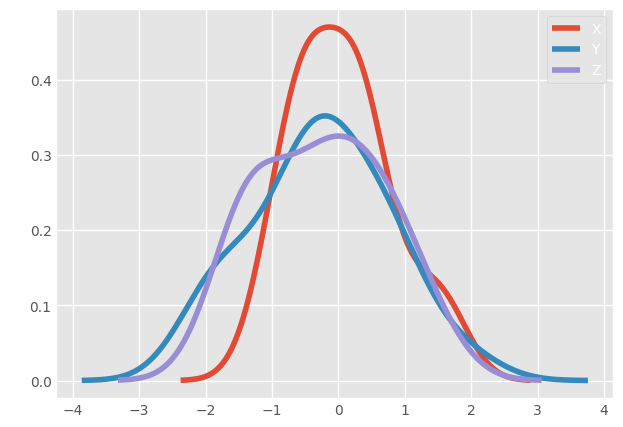

In [24]:
# Kernel Density Estimation plot (KDE)
df2['X'].plot.kde()
df2.plot.density()

<Axes: ylabel='AbsX'>

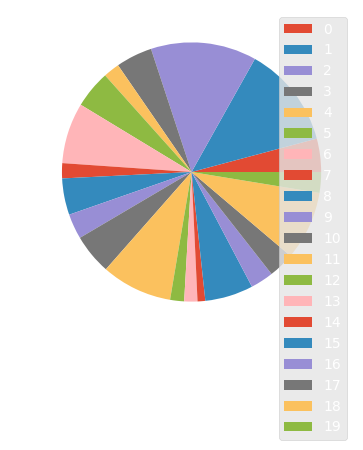

In [25]:
# Pie Plot
# DataFrame.plot.pie() or Series.plot.pie()
# If your data includes any NaN, they will be automatically filled with 0.
# A ValueError will be raised if there are any negative values in your data

# let's take use X column only
# # we get error because pie plot doesn't allow negative values
df2['AbsX'] = df2['X'].abs() # we turn the negative values to positive and store in new column
#df2['AbsX'].plot.pie(y = 'AbsX')

df2.plot.pie(y='AbsX',figsize=(12, 4),legend=True)

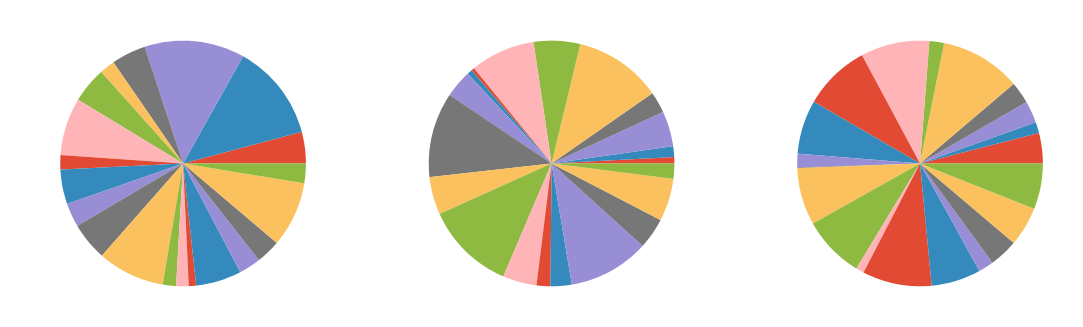

In [26]:
#  pass-in subplots=True instead of y to generate pie plots for each column as subplots
# A legend will be drawn in each pie plots by default; specify legend=False to hide it
df3 = df2.abs() # new df for positive values
df3 = df3.drop(['AbsX'], axis=1)
df3.plot.pie(subplots=True, figsize=(12, 4),legend=False);

#### Reference
https://matplotlib.org/2.0.2/users/colormaps.html